# Project

We will be downloading the datasets as a zip file from the website "https://www.fao.org/faostat/en/#data/QCL", from the All Data Normalized option. After loading the data we will be extracting data and analyse the data. In this case the zip file should be in the same dicrectory as this notebook.

We will also be working on the population data. So that we can understand how the use is land will complement the population of that area. We will be loading data from the website given below. We should also be considering that the zip file should be in the same directory as this notebook.
"https://population.un.org/wpp/Download/Archive/CSV/".

In [1]:
import numpy as np 
import pandas as pd
import zipfile

import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import plotly.express as px
from collections import Counter

from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.ensemble import StackingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectKBest, f_regression

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import svm

import numpy as np

from sklearn import datasets
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
import warnings

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.naive_bayes import GaussianNB

import pycountry_convert as pc
from sklearn.metrics import mean_squared_error, r2_score
warnings.filterwarnings("ignore")

# Extracting the .zip files

In [2]:
with zipfile.ZipFile("Production_Crops_Livestock_E_All_Data_(Normalized).zip","r") as zip_ref:
    zip_ref.extractall("targetdir")

In [3]:
with zipfile.ZipFile("WPP2019-CSV-data.zip","r") as zip_ref:
    zip_ref.extractall("targetdir")

# Reading the data

In [4]:
df_main = pd.read_csv("targetdir/Production_Crops_Livestock_E_All_Data_(Normalized).csv" ,encoding='cp1252')
df_main.head()

,Area Code,Area Code (M49),Area,Item Code,Item Code (CPC),Item,Element Code,Element,Year Code,Year,Unit,Value,Flag
0,2,'004,Afghanistan,221,'01371,"Almonds, in shell",5312,Area harvested,1975,1975,ha,0.0,E
1,2,'004,Afghanistan,221,'01371,"Almonds, in shell",5312,Area harvested,1976,1976,ha,5900.0,E
2,2,'004,Afghanistan,221,'01371,"Almonds, in shell",5312,Area harvested,1977,1977,ha,6000.0,E
3,2,'004,Afghanistan,221,'01371,"Almonds, in shell",5312,Area harvested,1978,1978,ha,6000.0,E
4,2,'004,Afghanistan,221,'01371,"Almonds, in shell",5312,Area harvested,1979,1979,ha,6000.0,E


In [5]:
df_pop = pd.read_csv("targetdir/WPP2019_TotalPopulationBySex.csv" ,encoding='cp1252')
df_pop.head()

,LocID,Location,VarID,Variant,Time,MidPeriod,PopMale,PopFemale,PopTotal,PopDensity
0,4,Afghanistan,2,Medium,1950,1950.5,4099.243,3652.874,7752.117,11.874
1,4,Afghanistan,2,Medium,1951,1951.5,4134.756,3705.395,7840.151,12.009
2,4,Afghanistan,2,Medium,1952,1952.5,4174.450,3761.546,7935.996,12.156
3,4,Afghanistan,2,Medium,1953,1953.5,4218.336,3821.348,8039.684,12.315
4,4,Afghanistan,2,Medium,1954,1954.5,4266.484,3884.832,8151.316,12.486


# Merging Datasets

In [6]:
df = pd.merge(df_main, df_pop,  how='inner', left_on=['Area','Year'], right_on = ['Location','Time'])
df.head()

,Area Code,Area Code (M49),Area,Item Code,Item Code (CPC),Item,Element Code,Element,Year Code,Year,...,LocID,Location,VarID,Variant,Time,MidPeriod,PopMale,PopFemale,PopTotal,PopDensity
0,2,'004,Afghanistan,221,'01371,"Almonds, in shell",5312,Area harvested,1975,1975,...,4,Afghanistan,2,Medium,1975,1975.5,6446.273,6242.891,12689.164,19.436
1,2,'004,Afghanistan,221,'01371,"Almonds, in shell",5510,Production,1975,1975,...,4,Afghanistan,2,Medium,1975,1975.5,6446.273,6242.891,12689.164,19.436
2,2,'004,Afghanistan,515,'01341,Apples,5312,Area harvested,1975,1975,...,4,Afghanistan,2,Medium,1975,1975.5,6446.273,6242.891,12689.164,19.436
3,2,'004,Afghanistan,515,'01341,Apples,5419,Yield,1975,1975,...,4,Afghanistan,2,Medium,1975,1975.5,6446.273,6242.891,12689.164,19.436
4,2,'004,Afghanistan,515,'01341,Apples,5510,Production,1975,1975,...,4,Afghanistan,2,Medium,1975,1975.5,6446.273,6242.891,12689.164,19.436


# Cleaning

In [7]:
rows_count, columns_count = df.shape
print('Total Number of rows :', rows_count)
print('Total Number of columns :', columns_count)

Total Number of rows : 4639552
Total Number of columns : 23


In [8]:
df.columns

Index(['Area Code', 'Area Code (M49)', 'Area', 'Item Code', 'Item Code (CPC)',
       'Item', 'Element Code', 'Element', 'Year Code', 'Year', 'Unit', 'Value',
       'Flag', 'LocID', 'Location', 'VarID', 'Variant', 'Time', 'MidPeriod',
       'PopMale', 'PopFemale', 'PopTotal', 'PopDensity'],
      dtype='object')

### Removing Null Data

In [9]:
df.isnull().sum()

Area Code              0
Area Code (M49)        0
Area                   0
Item Code              0
Item Code (CPC)        0
Item                   0
Element Code           0
Element                0
Year Code              0
Year                   0
Unit                   0
Value                  0
Flag                   0
LocID                  0
Location               0
VarID                  0
Variant                0
Time                   0
MidPeriod              0
PopMale            59499
PopFemale          59499
PopTotal               0
PopDensity             0
dtype: int64

In [10]:
df = df.dropna(how='any',axis=0)

In [11]:
df.isnull().sum()

Area Code          0
Area Code (M49)    0
Area               0
Item Code          0
Item Code (CPC)    0
Item               0
Element Code       0
Element            0
Year Code          0
Year               0
Unit               0
Value              0
Flag               0
LocID              0
Location           0
VarID              0
Variant            0
Time               0
MidPeriod          0
PopMale            0
PopFemale          0
PopTotal           0
PopDensity         0
dtype: int64

# Exploring the data:

In [12]:
df1 = df[['Area','Item','Element','Year','Unit','Variant','Value','Flag','PopMale','PopFemale','PopTotal','PopDensity']]
df1.insert(0, 'ID', df1.index)
df1.head()

,ID,Area,Item,Element,Year,Unit,Variant,Value,Flag,PopMale,PopFemale,PopTotal,PopDensity
0,0,Afghanistan,"Almonds, in shell",Area harvested,1975,ha,Medium,0.0,E,6446.273,6242.891,12689.164,19.436
1,1,Afghanistan,"Almonds, in shell",Production,1975,tonnes,Medium,0.0,E,6446.273,6242.891,12689.164,19.436
2,2,Afghanistan,Apples,Area harvested,1975,ha,Medium,3270.0,E,6446.273,6242.891,12689.164,19.436
3,3,Afghanistan,Apples,Yield,1975,hg/ha,Medium,85321.0,E,6446.273,6242.891,12689.164,19.436
4,4,Afghanistan,Apples,Production,1975,tonnes,Medium,27900.0,E,6446.273,6242.891,12689.164,19.436


In [13]:
df1.groupby(['Element']).size().index

Index(['Area harvested', 'Laying', 'Milk Animals', 'Prod Popultn',
       'Producing Animals/Slaughtered', 'Production', 'Stocks', 'Yield',
       'Yield/Carcass Weight'],
      dtype='object', name='Element')

In [14]:
print(df1.groupby(['Area']).size().index.tolist())

['Afghanistan', 'Africa', 'Albania', 'Algeria', 'Angola', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Asia', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan', 'Bolivia (Plurinational State of)', 'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'Brunei Darussalam', 'Bulgaria', 'Burkina Faso', 'Burundi', 'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada', 'Caribbean', 'Central African Republic', 'Central America', 'Central Asia', 'Chad', 'Chile', 'China', 'China, Hong Kong SAR', 'China, Macao SAR', 'Colombia', 'Comoros', 'Congo', 'Costa Rica', 'Croatia', 'Cuba', 'Cyprus', 'Czechia', 'Democratic Republic of the Congo', 'Denmark', 'Djibouti', 'Dominican Republic', 'Eastern Africa', 'Eastern Asia', 'Eastern Europe', 'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia', 'Eswatini', 'Ethiopia', 'Europe', 'Fiji', 'Finland', 'France', 'French Guiana', 'French Polynesia', 'Gabon', 'Gambi

In [15]:
df1.groupby(['Item']).size().index.tolist()

['Abaca, manila hemp, raw',
 'Agave fibres, raw, n.e.c.',
 'Almonds, in shell',
 'Anise, badian, coriander, cumin, caraway, fennel and juniper berries, raw',
 'Apples',
 'Apricots',
 'Areca nuts',
 'Artichokes',
 'Asparagus',
 'Asses',
 'Avocados',
 'Balata, gutta-percha, guayule, chicle and similar natural gums in primary forms or in plates, sheets or strip',
 'Bambara beans, dry',
 'Bananas',
 'Barley',
 'Beans, dry',
 'Beef and Buffalo Meat, primary',
 'Beer of barley, malted',
 'Bees',
 'Beeswax',
 'Blueberries',
 'Brazil nuts, in shell',
 'Broad beans and horse beans, dry',
 'Broad beans and horse beans, green',
 'Buckwheat',
 'Buffalo',
 'Buffalo fat, unrendered',
 'Butter and Ghee',
 'Butter and ghee of sheep milk',
 'Butter of buffalo milk',
 'Butter of cow milk',
 'Butter of goat milk',
 'Buttermilk, dry',
 'Cabbages',
 'Camels',
 'Canary seed',
 'Cantaloupes and other melons',
 'Carrots and turnips',
 'Cashew nuts, in shell',
 'Cashewapple',
 'Cassava leaves',
 'Cassava, fres

In [16]:
df1.groupby(['Unit']).size().index

Index(['0.1g/An', '1000 Head', '1000 No', '100mg/An', 'Head', 'No', 'No/An',
       'ha', 'hg', 'hg/An', 'hg/ha', 'tonnes'],
      dtype='object', name='Unit')

In [17]:
df1.groupby(['Flag']).count().index

Index(['A', 'E', 'I', 'M', 'T'], dtype='object', name='Flag')

In [18]:
df1.groupby(['Variant']).size().index

Index(['Constant fertility', 'Constant mortality', 'High',
       'Instant replacement', 'Low', 'Lower 80 PI', 'Lower 95 PI', 'Median PI',
       'Medium', 'Momentum', 'No change', 'Upper 80 PI', 'Upper 95 PI',
       'Zero migration'],
      dtype='object', name='Variant')

# Question And answer

# Question 1:

In [19]:
df2 = df1[df1['Item']=='Yoghurt'][df1['Element']=='Production'][['Area','Year','Value','PopTotal']]

In [20]:
df2 = df2.groupby(['Year','Area','Value']).mean()['PopTotal'].to_frame().reset_index()

In [21]:
df2['ygt_per'] = (df2['Value'])/df2['PopTotal']

In [22]:
df2 = df2.drop(['Value','PopTotal'], axis=1).groupby(['Area']).mean()['ygt_per'].to_frame().reset_index().sort_values(by=['ygt_per'], ascending=False).head(10)
df2.index = df2['Area']

In [23]:
df2

,Area,ygt_per
Area,,
Belarus,Belarus,33.650566
Lithuania,Lithuania,21.916318
Bulgaria,Bulgaria,19.282648
Jordan,Jordan,19.207144
Austria,Austria,17.245838
Croatia,Croatia,17.169900
Estonia,Estonia,15.247572
Sweden,Sweden,14.138242
Latvia,Latvia,12.513195


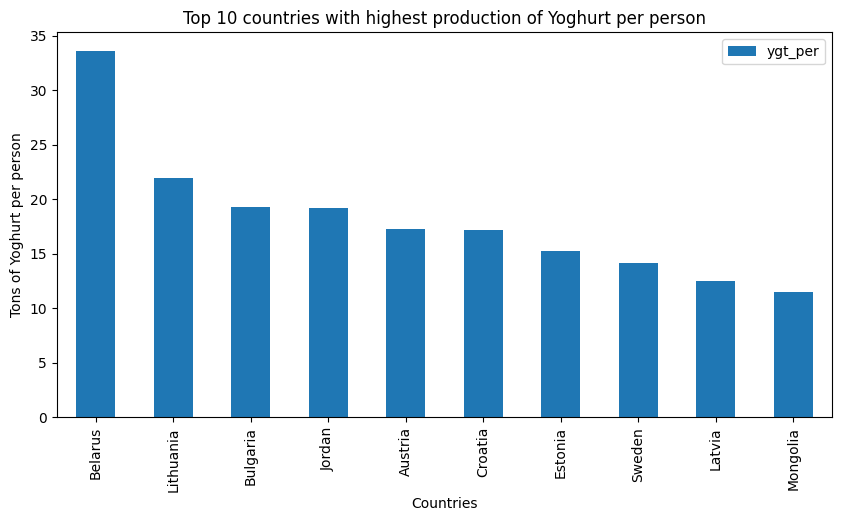

In [24]:
#Modifying the font of the graph.
font = {'family' : 'sans-serif',
        'weight' : 'normal',
        'size'   : 10}
matplotlib.rc('font', **font)


df2.plot.bar(figsize = (10, 5))
plt.xlabel("Countries")
plt.ylabel("Tons of Yoghurt per person")
plt.title("Top 10 countries with highest production of Yoghurt per person")
plt.show()

# Question 2:

In [25]:
df2 = df1[df1['Element']=='Producing Animals/Slaughtered'][['Year','Area','Value','PopDensity']]

In [26]:
df2 = df2.groupby(['Year','Area']).mean()

In [27]:
x = df2['Value'].to_frame().reset_index().drop('Area',axis =1).groupby(['Year']).sum()['Value'].to_frame().reset_index()
y = df2['PopDensity'].to_frame().reset_index().drop('Area',axis =1).groupby(['Year']).mean()['PopDensity'].to_frame().reset_index()

In [28]:
df2 = x
df2['PopDensity'] = y['PopDensity']
df2['Value'] = df2['Value']/10000

In [29]:
df2 = df2.drop(['Year'],axis=1)
df2['PopDensity'] = df2['PopDensity']*1000
df2.index = y['Year']

<Figure size 2400x1200 with 0 Axes>

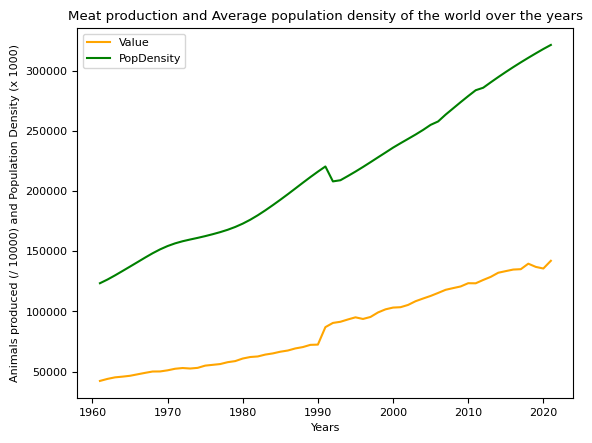

In [30]:
#Modifying the font of the graph.
font = {'family' : 'sans-serif',
        'weight' : 'normal',
        'size'   : 8}
matplotlib.rc('font', **font)

plt.figure(figsize=(16, 8), dpi=150)

df2.plot(color=['orange', 'green'])

plt.xlabel("Years")
plt.ylabel("Animals produced (/ 10000) and Population Density (x 1000)")
plt.title("Meat production and Average population density of the world over the years")
plt.show()

# Question 3:

In [31]:
df2 = df1

In [32]:
extra = ['Africa','Asia','Central America','Central Asia','Eastern Africa', 'Eastern Asia', 'Eastern Europe','Europe','Middle Africa','Northern Africa', 'Northern America', 'Northern Europe','South America','Southern Africa', 'Southern Asia', 'Southern Europe','Western Africa', 'Western Asia', 'Western Europe', 'World']
df2 = df2[df2.Area.isin(extra) == False]

In [33]:
df2 = df2[df2['Item']=='Beef and Buffalo Meat, primary'][df2['Element']=='Production'][df2['Year']>2009][['Area','Year','Value']]

In [34]:
df2 = df2.groupby(['Year','Area']).mean()['Value'].to_frame().reset_index()

In [35]:
df2 = df2.groupby(['Area']).sum()['Value'].to_frame().reset_index().sort_values(by=['Value'], ascending=False)

In [36]:
df2['Value'] = df2['Value']/1000

In [37]:
total = sum(df2['Value'])
df2['Area'] = [df2.iloc[x]['Area']+" "+str((df2.iloc[x]['Value']/total)*100)[0:4]+"%" for x in range(0,len(df2))]

In [38]:
area = df2['Area']
df2.drop('Area',axis = 1,inplace=True)
df2.index = area
df2 = df2.head(50)

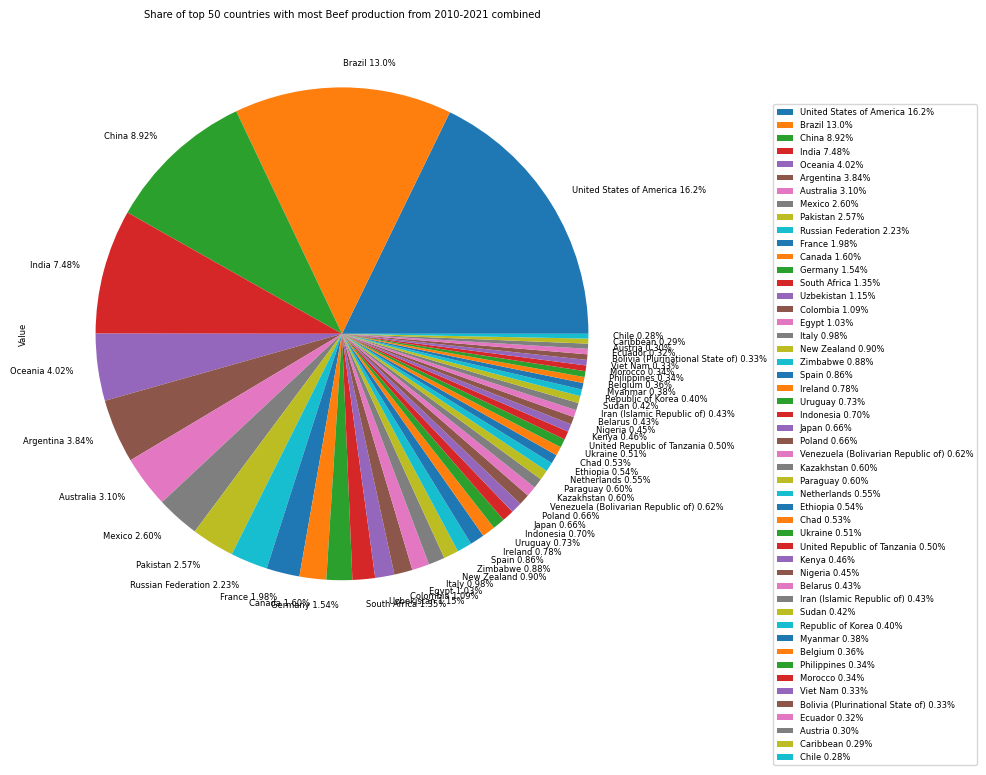

In [39]:
#Modifying the font of the graph.
font = {'family' : 'sans-serif',
        'weight' : 'normal',
        'size'   : 6}
matplotlib.rc('font', **font)

df2.plot(kind='pie', y='Value',figsize=(16, 8))
plt.legend(loc=(1.2,-0.2))
plt.title("Share of top 50 countries with most Beef production from 2010-2021 combined")
plt.show()

# Question 4:

In [40]:
df2 = df1

In [41]:
continents = ['Africa','Asia','Europe','Northern America','South America']
df2 = df2[df2['Area'].isin(continents)][df2['Element']=='Area harvested'][['Area','Year','Item','Value']]

In [42]:
df2 = df2.groupby(['Year','Area','Item']).mean()['Value'].to_frame().reset_index().drop('Item',axis=1)

In [43]:
df2 = df2.groupby(['Year','Area']).sum()['Value'].to_frame().reset_index()

In [44]:
df2 = df2.pivot(index='Year', columns='Area')['Value'][['South America','Northern America','Europe','Africa','Asia']]

<Figure size 1500x1200 with 0 Axes>

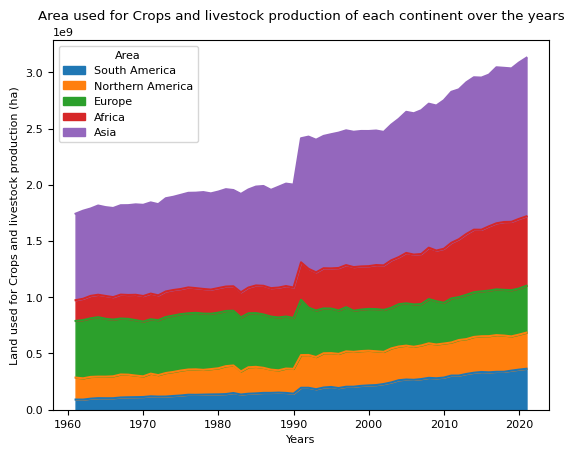

In [45]:
#Modifying the font of the graph.
font = {'family' : 'sans-serif',
        'weight' : 'normal',
        'size'   : 8}
matplotlib.rc('font', **font)

plt.figure(figsize=(15, 12))

df2.plot.area()

plt.xlabel("Years")
plt.ylabel("Land used for Crops and livestock production (ha)")
plt.title("Area used for Crops and livestock production of each continent over the years")
plt.show()



# Question 5:

In [46]:
df2=df1

In [47]:
continents = ['Africa','Asia','Europe','Northern America','South America']
df2 = df2[df2['Area'].isin(continents)][df2['Item'].isin(['Rice','Wheat'])][['Area','Year','Item','Value','Element','Unit']]

In [48]:
df2 = df2.groupby(['Area','Item','Element','Unit']).mean()['Value'].to_frame().reset_index()

In [49]:
area = df2[df2['Element']=='Area harvested']
area.index = area['Area']
area = area.pivot(index='Area', columns='Item', values='Value')
area

Item,Rice,Wheat
Area,,
Africa,9.389475e+06,9.136457e+06
Asia,1.336215e+08,9.019883e+07
Europe,7.091745e+05,6.970393e+07
Northern America,1.096933e+06,3.070031e+07
South America,5.242574e+06,9.100699e+06


In [50]:
prod = df2[df2['Element']=='Production']
prod.index = prod['Area']
prod = prod.pivot(index='Area', columns='Item', values='Value')
prod

Item,Rice,Wheat
Area,,
Africa,2.118773e+07,1.824215e+07
Asia,5.220728e+08,2.360100e+08
Europe,3.650535e+06,2.089356e+08
Northern America,7.757652e+06,7.800334e+07
South America,1.910868e+07,2.032147e+07


In [51]:
yeild = df2[df2['Element']=='Yield']
yeild.index = yeild['Area']
yeild = yeild.pivot(index='Area', columns='Item', values='Value')
yeild

Item,Rice,Wheat
Area,,
Africa,21519.548780,19444.439024
Asia,38393.292683,24943.365854
Europe,52726.768293,31752.682927
Northern America,69599.353659,26036.975610
South America,39386.743902,21949.719512


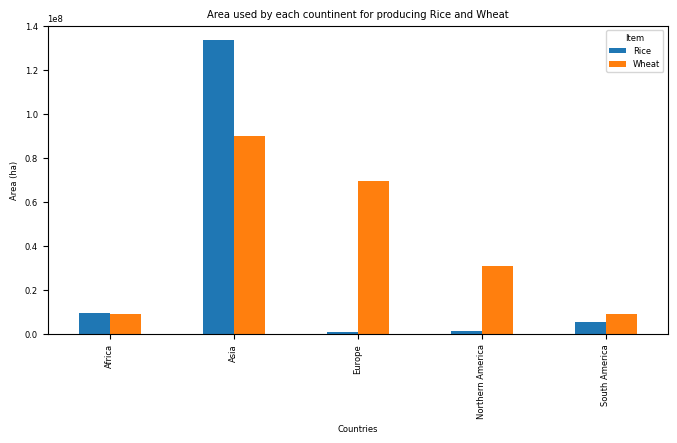

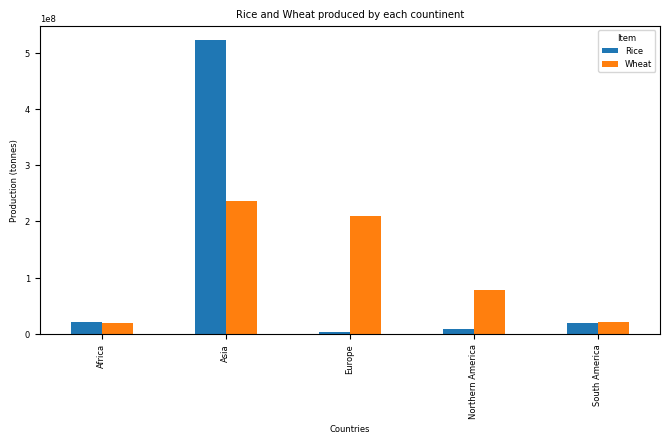

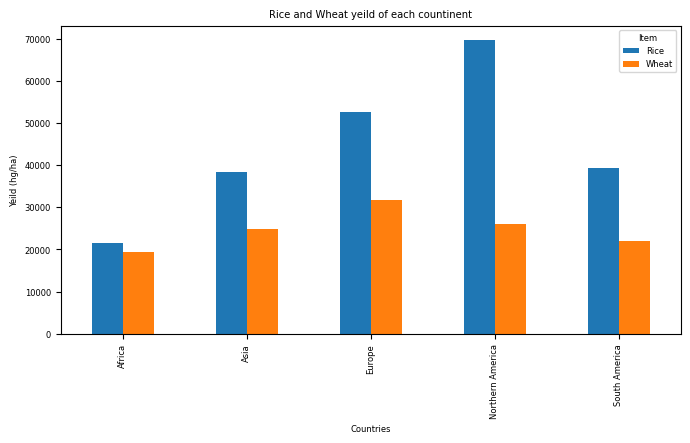

In [52]:
#Modifying the font of the graph.
font = {'family' : 'sans-serif',
        'weight' : 'normal',
        'size'   : 6}
matplotlib.rc('font', **font)

ax = area[['Rice','Wheat']].plot.bar(figsize = (8, 4))
plt.xlabel("Countries")
plt.ylabel("Area (ha)")
plt.title("Area used by each countinent for producing Rice and Wheat")
plt.show() 

ax1 = prod[['Rice','Wheat']].plot.bar(figsize = (8, 4))
plt.xlabel("Countries")
plt.ylabel("Production (tonnes)")
plt.title("Rice and Wheat produced by each countinent")
plt.show() 

ax2 = yeild[['Rice','Wheat']].plot.bar(figsize = (8, 4))
plt.xlabel("Countries")
plt.ylabel("Yeild (hg/ha)")
plt.title("Rice and Wheat yeild of each countinent")
plt.show() 

# Question 6:

In [53]:
df2 = df1

In [54]:
df2 = df2[df2['Element']=='Stocks'][['Area','Year','Item','Value','PopTotal']]
df2 = df2.groupby(['Area','Item']).mean().reset_index().drop(['Year','Item'],axis=1)

In [55]:
x = df2[['Area','PopTotal']].groupby(['Area']).mean()['PopTotal']
df2 = df2[['Area','Value']].groupby(['Area']).sum().reset_index()
df2['anim_per_pop'] = df2['Value']/x.tolist()

In [56]:
df2 = df2.sort_values(by=['anim_per_pop'], ascending=False).reset_index().drop(['index','Value'],axis=1)
x = df2.iloc[0:10,:]
y = df2.iloc[-10:,:]
x.index = x['Area']
y.index = y['Area']

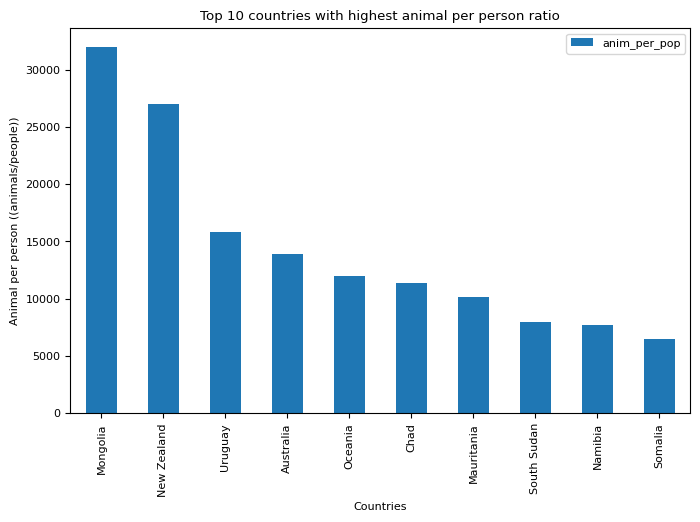

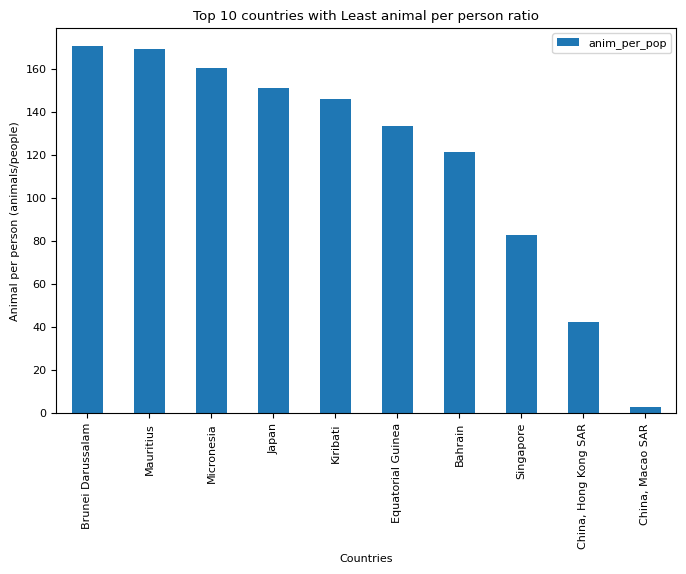

In [57]:
#Modifying the font of the graph.
font = {'family' : 'sans-serif',
        'weight' : 'normal',
        'size'   : 8}
matplotlib.rc('font', **font)


x.plot.bar(figsize = (8, 5))
plt.xlabel("Countries")
plt.ylabel("Animal per person ((animals/people))")
plt.title("Top 10 countries with highest animal per person ratio")
plt.show()

y.plot.bar(figsize = (8, 5))
plt.xlabel("Countries")
plt.ylabel("Animal per person (animals/people)")
plt.title("Top 10 countries with Least animal per person ratio")
plt.show()

# Preparing the data:

In [58]:
pd.set_option('display.max_columns', None)
print(df.head())

   Area Code Area Code (M49)         Area  Item Code Item Code (CPC)   
0          2            '004  Afghanistan        221          '01371  \
1          2            '004  Afghanistan        221          '01371   
2          2            '004  Afghanistan        515          '01341   
3          2            '004  Afghanistan        515          '01341   
4          2            '004  Afghanistan        515          '01341   

                Item  Element Code         Element  Year Code  Year    Unit   
0  Almonds, in shell          5312  Area harvested       1975  1975      ha  \
1  Almonds, in shell          5510      Production       1975  1975  tonnes   
2             Apples          5312  Area harvested       1975  1975      ha   
3             Apples          5419           Yield       1975  1975   hg/ha   
4             Apples          5510      Production       1975  1975  tonnes   

     Value Flag  LocID     Location  VarID Variant  Time  MidPeriod   PopMale   
0      0.0 

# Encoding:

In [59]:
df_area = df[['Area Code','Area Code (M49)','Area']].copy()
df_area.head()

,Area Code,Area Code (M49),Area
0,2,'004,Afghanistan
1,2,'004,Afghanistan
2,2,'004,Afghanistan
3,2,'004,Afghanistan
4,2,'004,Afghanistan


In [60]:
df_item = df[['Item Code','Item Code (CPC)','Item']].copy()
df_item.head()

,Item Code,Item Code (CPC),Item
0,221,'01371,"Almonds, in shell"
1,221,'01371,"Almonds, in shell"
2,515,'01341,Apples
3,515,'01341,Apples
4,515,'01341,Apples


In [61]:
df_element = df[['Element Code','Element']].copy()
df_element.head()

,Element Code,Element
0,5312,Area harvested
1,5510,Production
2,5312,Area harvested
3,5419,Yield
4,5510,Production


In [62]:
df_location = df[['LocID','Location']]
df_location.head()

,LocID,Location
0,4,Afghanistan
1,4,Afghanistan
2,4,Afghanistan
3,4,Afghanistan
4,4,Afghanistan


In [63]:
df_variant = df[['VarID','Variant']]
df_variant.head()

,VarID,Variant
0,2,Medium
1,2,Medium
2,2,Medium
3,2,Medium
4,2,Medium


In [64]:
df = df.drop(['Area','Area Code (M49)','Item','Item Code (CPC)','Element','Year Code','Time','Variant','LocID','MidPeriod','Location'], axis=1)

In [65]:
df = df.rename(columns={'Area Code': 'Area','Item Code': 'Item','Element Code':'Element','VarID':'Variant'})

### Convering data into numeric format:

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4580053 entries, 0 to 4639551
Data columns (total 12 columns):
 #   Column      Dtype  
---  ------      -----  
 0   Area        int64  
 1   Item        int64  
 2   Element     int64  
 3   Year        int64  
 4   Unit        object 
 5   Value       float64
 6   Flag        object 
 7   Variant     int64  
 8   PopMale     float64
 9   PopFemale   float64
 10  PopTotal    float64
 11  PopDensity  float64
dtypes: float64(5), int64(5), object(2)
memory usage: 583.3+ MB


In [67]:
le = LabelEncoder()
df['Unit'] = df[['Unit']].apply(le.fit_transform)
df['Flag'] = df[['Flag']].apply(le.fit_transform)

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4580053 entries, 0 to 4639551
Data columns (total 12 columns):
 #   Column      Dtype  
---  ------      -----  
 0   Area        int64  
 1   Item        int64  
 2   Element     int64  
 3   Year        int64  
 4   Unit        int64  
 5   Value       float64
 6   Flag        int64  
 7   Variant     int64  
 8   PopMale     float64
 9   PopFemale   float64
 10  PopTotal    float64
 11  PopDensity  float64
dtypes: float64(5), int64(7)
memory usage: 583.3 MB


# EDA:

In [69]:
df_transpose = df.describe().T
df_transpose

,count,mean,std,min,25%,50%,75%,max
Area,4580053.0,1.252760e+03,2.126951e+03,1.000,84.000,158.000,249.000,5.504000e+03
Item,4580053.0,8.455449e+02,1.257774e+03,15.000,358.000,600.000,1058.000,1.753000e+04
Element,4580053.0,5.408198e+03,1.028702e+02,5111.000,5312.000,5419.000,5510.000,5.513000e+03
Year,4580053.0,2.001492e+03,1.887664e+01,1961.000,1987.000,2006.000,2020.000,2.021000e+03
Unit,4580053.0,8.582254e+00,2.902101e+00,0.000,7.000,10.000,11.000,1.100000e+01
Value,4580053.0,2.533385e+06,3.089577e+07,0.000,2353.000,22440.000,156400.000,3.070645e+09
Flag,4580053.0,8.590717e-01,8.409299e-01,0.000,0.000,1.000,1.000,4.000000e+00
Variant,4580053.0,1.709767e+01,5.135268e+01,2.000,2.000,2.000,4.000,2.070000e+02
PopMale,4580053.0,1.180161e+05,4.224205e+05,16.749,2286.823,8381.260,42978.083,3.974825e+06
PopFemale,4580053.0,1.161976e+05,4.123979e+05,16.366,2284.596,8554.487,43201.725,3.908977e+06


<Axes: title={'center': 'Correlation of Attributes'}>

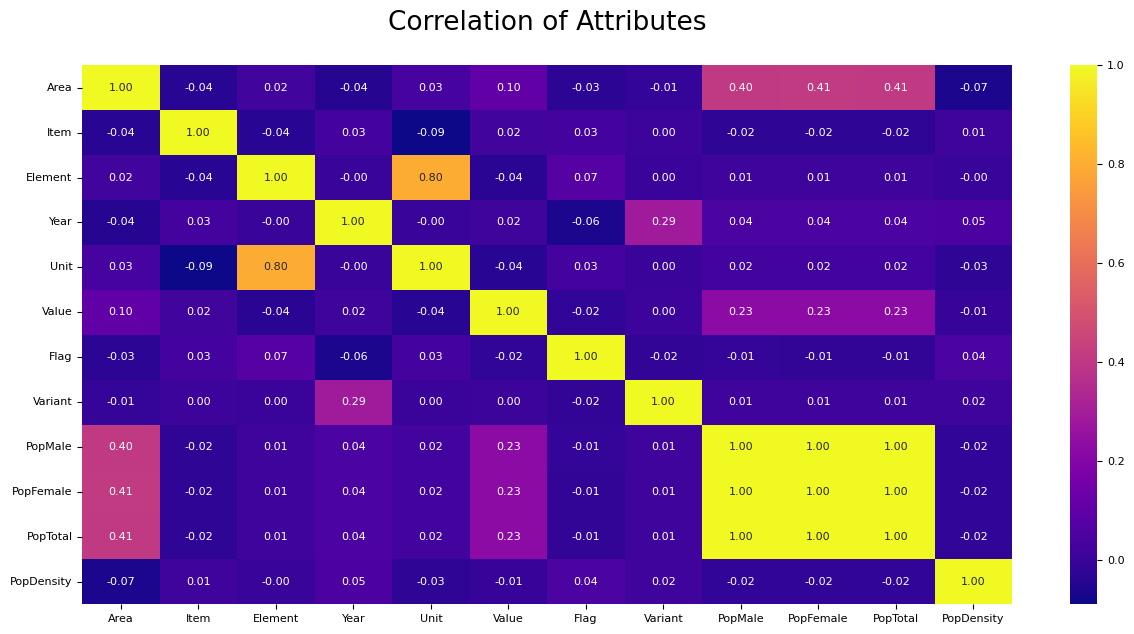

In [70]:
plt.figure(figsize = (15,7))
plt.title('Correlation of Attributes', y=1.05, size=19)
sns.heatmap(df.corr(), cmap='plasma',annot=True, fmt='.2f')

<Axes: >

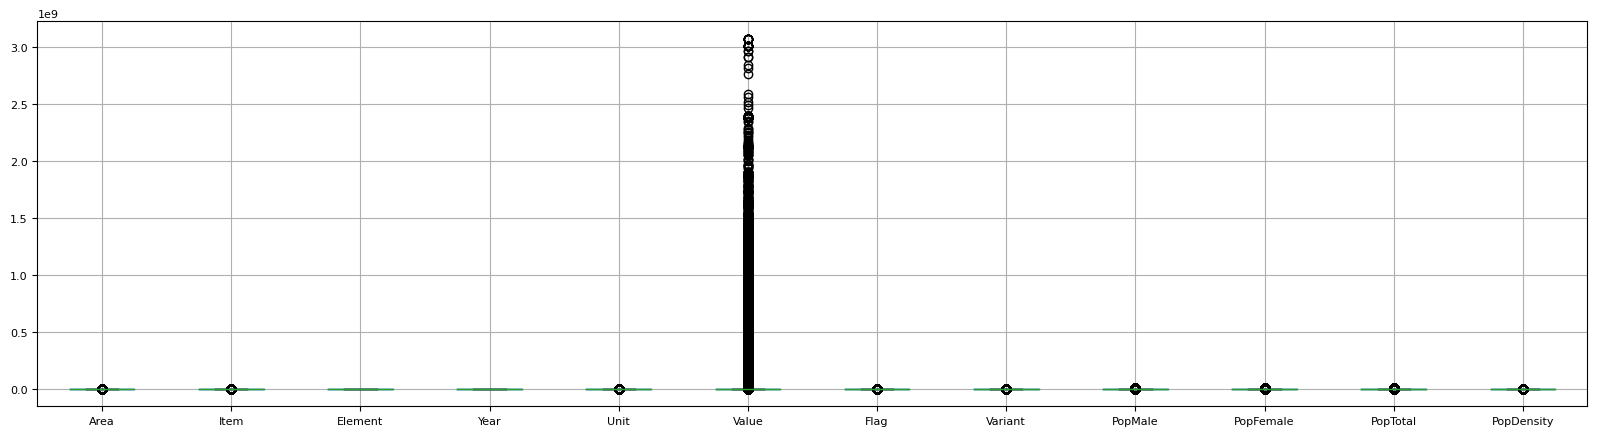

In [71]:
df.boxplot(return_type='axes', figsize=(20,5))

## Finding Outliners

In [72]:
#We get only continious values to find the outliers
cat = ['Area','Item','Element','Variant','Unit','Flag','Year']
df_test = df.drop(cat,axis=1)

In [73]:
df_test.groupby('Value').first()

,PopMale,PopFemale,PopTotal,PopDensity
Value,,,,
0.000000e+00,6446.273,6242.891,12689.164,19.436
1.000000e-02,2205.325,2121.008,4326.333,4120.317
2.000000e-02,96.367,94.769,191.136,8.379
3.000000e-02,128.405,126.663,255.068,11.182
4.000000e-02,43.373,47.034,90.407,205.470
...,...,...,...,...
2.911950e+09,3763157.221,3700864.713,7464021.934,57.374
2.962815e+09,3889034.611,3824433.594,7713468.205,59.291
2.966111e+09,3805469.093,3742389.807,7547858.900,58.018


In [74]:
df_test.groupby('PopTotal').first()

,Value,PopMale,PopFemale,PopDensity
PopTotal,,,,
33.115,50.0,16.749,16.366,0.403
34.379,50.0,17.496,16.883,0.418
35.770,50.0,18.333,17.437,0.435
37.284,50.0,19.234,18.050,0.454
38.893,50.0,20.163,18.730,0.473
...,...,...,...,...
7874751.698,174067.0,3970061.482,3904690.216,60.531
7874965.732,174067.0,3970238.390,3904727.342,60.533
7876434.843,174067.0,3970971.240,3905463.603,60.544


<Axes: xlabel='Value'>

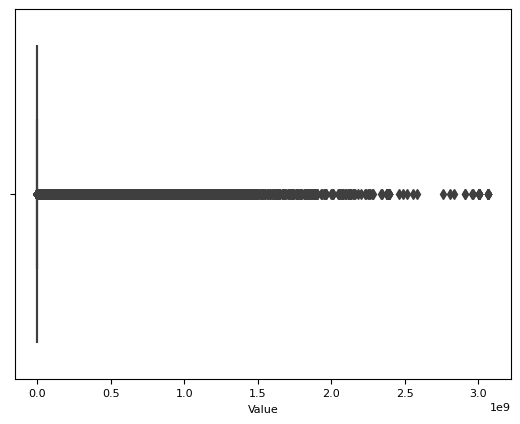

In [75]:
import seaborn as sns
sns.boxplot(x=df_test['Value'])

<Axes: xlabel='PopTotal'>

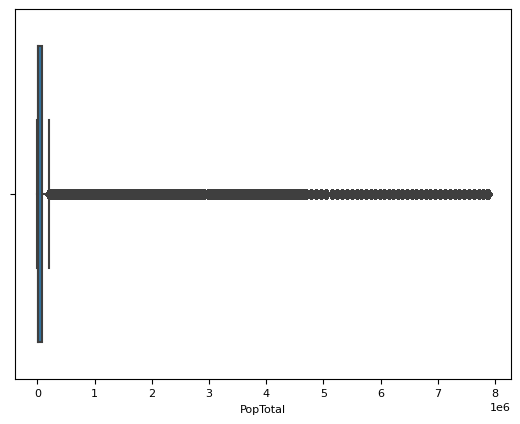

In [76]:
sns.boxplot(x=df_test['PopTotal'])

In [77]:
Q1 =  df['Value'].quantile(0.25) # 1º Quartile
Q3 =  df['Value'].quantile(0.75) # 3º Quartile
IQR = Q3 - Q1                      # Interquartile range
print('Interquartile range = ', IQR)
print('Numerber of outliers in balance column below the lower whisker :', df[df['Value'] < (Q1-(1.5*IQR))]['Value'].count())
print('Numerber of outliers above balance column the uper whisker  :', df[df['Value'] > (Q3+(1.5*IQR))]['Value'].count())



Interquartile range =  154047.0
Numerber of outliers in balance column below the lower whisker : 0
Numerber of outliers above balance column the uper whisker  : 744910


In [78]:
for i in df_test.columns.tolist():
    Q1 = df.describe().at['25%', i]
    Q3 = df.describe().at['75%', i]
    IQR = Q3-Q1
    LTV = Q1 - 1.5 * IQR 
    UTV = Q3 + 1.5 * IQR 
    print('Column Name                                         :', i)
    print('Interquartile range IQR                             :', IQR)
    print('Numerber of outliers below the lower whisker        :', df[df[i] < LTV][i].count())
    print('Numerber of outliers above the upper whisker         :', df[df[i] > UTV][i].count())
    print('Total Numbers of Ourliers                           :', (df[df[i] < LTV][i].count()) + (df[df[i] > UTV][i].count()))
    
    print('\n')

Column Name                                         : Value
Interquartile range IQR                             : 154047.0
Numerber of outliers below the lower whisker        : 0
Numerber of outliers above the upper whisker         : 744910
Total Numbers of Ourliers                           : 744910


Column Name                                         : PopMale
Interquartile range IQR                             : 40691.26
Numerber of outliers below the lower whisker        : 0
Numerber of outliers above the upper whisker         : 714200
Total Numbers of Ourliers                           : 714200


Column Name                                         : PopFemale
Interquartile range IQR                             : 40917.129
Numerber of outliers below the lower whisker        : 0
Numerber of outliers above the upper whisker         : 708322
Total Numbers of Ourliers                           : 708322


Column Name                                         : PopTotal
Interquartile rang

In [79]:
pd.set_option('display.float_format', '{:.2f}'.format)
df_transpose = df_test.describe().T
df_transpose

,count,mean,std,min,25%,50%,75%,max
Value,4580053.00,2533384.74,30895774.14,0.00,2353.00,22440.00,156400.00,3070645412.97
PopMale,4580053.00,118016.12,422420.48,16.75,2286.82,8381.26,42978.08,3974824.83
PopFemale,4580053.00,116197.56,412397.86,16.37,2284.60,8554.49,43201.72,3908976.96
PopTotal,4580053.00,234213.67,834767.07,33.12,4569.38,16907.77,86243.42,7883801.79
PopDensity,4580053.00,157.30,761.71,0.40,21.29,58.97,122.45,22111.67


## Removing necesary Outliners

In [80]:
from collections import Counter
def detect_outliers(data,features):
    outlier_indices = []
    for c in features:
        Q1 = np.percentile(data[c],25)
        Q3 = np.percentile(data[c],75)
        IQR = Q3 - Q1
        outlier_step = IQR * 1.5
        outlier_list_col = data[(data[c] < Q1 - outlier_step) | (data[c] > Q3 + outlier_step)].index
        outlier_indices.extend(outlier_list_col)
    
    #We only remove the rows which are outliers in 2 or more columns.
    outlier_indices = Counter(outlier_indices)
    multiple_outliers = list(i for i, v in outlier_indices.items() if v > 2)
    
    return multiple_outliers

In [81]:
indexes = df_test.loc[detect_outliers(df_test,df_test.columns)]
print("Number of rows to be delete are :",len(indexes.index.tolist()))

Number of rows to be delete are : 706721


In [82]:
df = df.drop(indexes.index.tolist(), axis=0).reset_index(drop=True)

In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3873332 entries, 0 to 3873331
Data columns (total 12 columns):
 #   Column      Dtype  
---  ------      -----  
 0   Area        int64  
 1   Item        int64  
 2   Element     int64  
 3   Year        int64  
 4   Unit        int64  
 5   Value       float64
 6   Flag        int64  
 7   Variant     int64  
 8   PopMale     float64
 9   PopFemale   float64
 10  PopTotal    float64
 11  PopDensity  float64
dtypes: float64(5), int64(7)
memory usage: 354.6 MB


# Case 1: Continent (Discrete Data)

# Extracting Data:

In [84]:
dfx = df

In [85]:
def country_to_continent(country_name):
    country_alpha2 = pc.country_name_to_country_alpha2(country_name)
    country_continent_code = pc.country_alpha2_to_continent_code(country_alpha2)
    country_continent_name = pc.convert_continent_code_to_continent_name(country_continent_code)
    return country_continent_name

extra = ['Africa','Oceania','Asia','Central America','Central Asia','Eastern Africa', 'Eastern Asia', 'Eastern Europe','Europe','Middle Africa','Northern Africa', 'Northern America', 'Northern Europe','South America','Southern Africa', 'Southern Asia', 'Southern Europe','Western Africa', 'Western Asia', 'Western Europe', 'World','Bolivia (Plurinational State of)','Caribbean','China, Hong Kong SAR','China, Macao SAR','Iran (Islamic Republic of)','Melanesia','Polynesia','Republic of Korea','TL','Timor-Leste','Venezuela (Bolivarian Republic of)']
dfu = df_area[df_area.Area.isin(extra) == False]

dfu['continent'] = [country_to_continent(x) for x in dfu['Area']]
cont1 = {'Asia': 1,
 'Africa': 2,
 'Europe': 3,
 'North America': 4,
 'Oceania': 5,
 'South America':6
 }
dfu['continent'] = dfu['continent'].map(cont1)

In [86]:
t = dict(zip(dfu['Area Code'], dfu['continent']))
dfx['continent'] = [-1 if(t.get(x)==None) else (t[x])for x in dfx['Area']]
dfx = dfx[dfx['continent'].isin([1,2,3,4,5,6])].drop(['Area'],axis=1)

## Feature Selection

In [87]:
X = dfx.drop('continent', axis=1)
y = dfx[['continent']]

k = 10
selector = SelectKBest(score_func=f_regression, k=k)
selector.fit(X, y)
selected_features = selector.get_support(indices=True)
selected_feature_names = X.columns[selected_features]
X_new = dfx[selected_feature_names]
print(selected_feature_names)

Index(['Item', 'Year', 'Unit', 'Value', 'Flag', 'Variant', 'PopMale',
       'PopFemale', 'PopTotal', 'PopDensity'],
      dtype='object')


## Splitting data

In [88]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.20, random_state=7)
print('x train data {}'.format(X_train.shape))
print('y train data {}'.format(y_train.shape))
print('x test data  {}'.format(X_test.shape))
print('y test data  {}'.format(y_test.shape))

x train data (2642966, 10)
y train data (2642966, 1)
x test data  (660742, 10)
y test data  (660742, 1)


# Prediction Algorithms:

### Logistic Regression

In [89]:
model = LogisticRegression().fit(X_train, y_train)
print("Stats for logistic Regression : ")
print("Train Accuracy :",accuracy_score(model.predict(X_train),y_train)*100,"%")
print("Test Accuracy :",accuracy_score(model.predict(X_test),y_test)*100,"%")

Stats for logistic Regression : 
Train Accuracy : 26.91582108888272 %
Test Accuracy : 26.943042821555164 %


### K-Neighbors Classifier

In [90]:
model = KNeighborsClassifier(n_neighbors=6).fit(X_train, y_train)
print("Stats for KNN : ")
print("Train Accuracy :",accuracy_score(model.predict(X_train),y_train)*100,"%")
print("Test Accuracy :",accuracy_score(model.predict(X_test),y_test)*100,"%")

Stats for KNN : 
Train Accuracy : 80.28419586177044 %
Test Accuracy : 72.91620632561575 %


### Decision Tree Classifier

In [91]:
model = DecisionTreeClassifier(max_depth=5).fit(X_train, y_train)
print("Stats for Decision tree : ")
print("Train Accuracy :",accuracy_score(model.predict(X_train),y_train)*100,"%")
print("Test Accuracy :",accuracy_score(model.predict(X_test),y_test)*100,"%")

Stats for Decision tree : 
Train Accuracy : 52.124393579032045 %
Test Accuracy : 52.29317948609291 %


# Handling imbalanced data

In [92]:
from imblearn.over_sampling import SMOTE
X_train, y_train = SMOTE().fit_resample(X_train, y_train)
X_test, y_test = SMOTE().fit_resample(X_test, y_test)
print('x train data {}'.format(X_train.shape))
print('y train data {}'.format(y_train.shape))
print('x test data  {}'.format(X_test.shape))
print('y test data  {}'.format(y_test.shape))

x train data (4562568, 10)
y train data (4562568, 1)
x test data  (1145394, 10)
y test data  (1145394, 1)


### Logistic Regression

In [93]:
model = LogisticRegression().fit(X_train, y_train)
print("Stats for logistic Regression : ")
print("Train Accuracy :",accuracy_score(model.predict(X_train),y_train)*100,"%")
print("Test Accuracy :",accuracy_score(model.predict(X_test),y_test)*100,"%")

Stats for logistic Regression : 
Train Accuracy : 21.163081843382937 %
Test Accuracy : 21.190088301492764 %


### K-Neighbors Classifier

In [94]:
model = KNeighborsClassifier(n_neighbors=6).fit(X_train, y_train)
print("Stats for KNN : ")
print("Train Accuracy :",accuracy_score(model.predict(X_train),y_train)*100,"%")
print("Test Accuracy :",accuracy_score(model.predict(X_test),y_test)*100,"%")

Stats for KNN : 
Train Accuracy : 87.79082306280146 %
Test Accuracy : 72.35265768809684 %


### Decision Tree Classifier

In [95]:
model = DecisionTreeClassifier(max_depth=5).fit(X_train, y_train)
print("Stats for Decision tree : ")
print("Train Accuracy :",accuracy_score(model.predict(X_train),y_train)*100,"%")
print("Test Accuracy :",accuracy_score(model.predict(X_test),y_test)*100,"%")

Stats for Decision tree : 
Train Accuracy : 55.157139575782764 %
Test Accuracy : 55.09222154123384 %


After handelling imbalences we get better acuracy for both K-Neighbors Classifier and Decision Tree Classifier.

# Case 2: Area (Continues Data)

# Extracting Data:

In [97]:
#Getting Area of all the countries
dfy = df 
dfy = dfy[dfy['Element']==5312].drop(['Element','Unit','continent'],axis=1)

## Feature Selection

In [98]:
X = dfy.drop('Value', axis=1)
y = dfy[['Value']]

k = 8
selector = SelectKBest(score_func=f_regression, k=k)
selector.fit(X, y)
selected_features = selector.get_support(indices=True)
selected_feature_names = X.columns[selected_features]
X_new = dfy[selected_feature_names]
print(selected_feature_names)

Index(['Area', 'Item', 'Year', 'Flag', 'PopMale', 'PopFemale', 'PopTotal',
       'PopDensity'],
      dtype='object')


## Splitting data

In [99]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.20, random_state=7)
print('x train data {}'.format(X_train.shape))
print('y train data {}'.format(y_train.shape))
print('x test data  {}'.format(X_test.shape))
print('y test data  {}'.format(y_test.shape))

x train data (652490, 8)
y train data (652490, 1)
x test data  (163123, 8)
y test data  (163123, 1)


# Prediction Algorithms:

### Decision Tree Regression

In [100]:
# Train decision tree regression model
dt_model = DecisionTreeRegressor()
dt_model.fit(X_train, y_train)

# Predict on test set using decision tree regression
dt_pred = dt_model.predict(X_test)
dt_rmse = np.sqrt(mean_squared_error(y_test, dt_pred))
dt_r2 = r2_score(y_test, dt_pred)

print("Decision Tree Regression:\nRMSE =", dt_rmse, "\nAccuracy =", dt_r2*100)

Decision Tree Regression:
RMSE = 159001.63097221206 
Accuracy = 97.9330542429852


### Random Forest Regression

In [101]:

# Train random forest regression model
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)

# Predict on test set using random forest regression
rf_pred = rf_model.predict(X_test)
rf_rmse = np.sqrt(mean_squared_error(y_test, rf_pred))
rf_r2 = r2_score(y_test, rf_pred)

print("Random Forest Regression:\nRMSE =", rf_rmse, "\nAccuracy=", rf_r2*100)

Random Forest Regression:
RMSE = 116448.66658043794 
Accuracy= 98.89134872423784


We can say that Random Forest Regression is the best Model for this case.